<h1>Building a CNN Model for Image Classification</h1>

<h3>Objective</h3>
<p>The goal of this assignment is to design, implement, and evaluate a Convolutional Neural Network (CNN) model using a real-world dataset. Students will gain hands-on experience in data preprocessing, CNN architecture design, training, evaluation, and model interpretation</p>

<h2>Part A: Data Understanding and Preprocessing
</h2>

<h3>Load the dataset </h3>

In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
data_dir = "C:/Users/sheji/Desktop/Data science/CNN"
train_dir = os.path.join(data_dir, "seg_train")
test_dir = os.path.join(data_dir, "seg_test")
# Image settings
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

<h3>Explore Dataset Structure</h3>

Classes available in training set: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


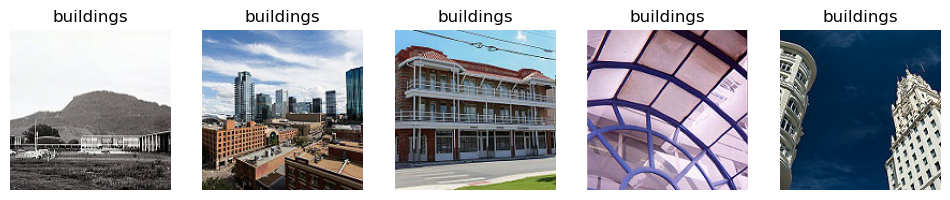

In [5]:
print("Classes available in training set:", os.listdir(train_dir))
# Show sample images
sample_class = os.listdir(train_dir)[0]  # pick first class
sample_path = os.path.join(train_dir, sample_class)
sample_images = os.listdir(sample_path)[:5]
plt.figure(figsize=(12, 6))
for i, img_name in enumerate(sample_images):
    img = plt.imread(os.path.join(sample_path, img_name))
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(sample_class)
    plt.axis("off")
plt.show()

<h3>Data Preprocessing & Augmentation</h3>

In [9]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values (0-1)
    rotation_range=20,          # Random rotations
    width_shift_range=0.2,      # Horizontal shift
    height_shift_range=0.2,     # Vertical shift
    shear_range=0.2,            # Shear
    zoom_range=0.2,             # Zoom
    horizontal_flip=True,       # Random flip
    validation_split=0.2        # Use 20% of train as validation
)
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test set
# Create generators
#Create Train, Validation, and Test Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)
print("\nData is ready!")

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.

Data is ready!


<h2>Part B: CNN Model Development
</h2>

<h3>Build a Convolutional Neural Network (CNN)</h3>

In [11]:
from tensorflow.keras import layers, models, Input

In [13]:
# Define CNN Architecture
model = models.Sequential([
    # Explicit Input Layer
    Input(shape=(150, 150, 3)),
    # 1st Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 2nd Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 3rd Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten before Fully Connected Layers
    layers.Flatten(),
    # Fully Connected Layers with Dropout
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    # Output Layer
    layers.Dense(6, activation='softmax')
])

<h3>Compile the model</h3>

In [15]:
# Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,564,998 (36.49 MB)

 Trainable params: 9,564,998 (36.49 MB)

 Non-trainable params: 0 (0.00 B)

<h3>Train the CNN model</h3>

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Define Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,            # stop if no improvement for 3 epochs
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    filepath='best_cnn_model.keras',  # change extension to .keras
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)
# Train Model with Callbacks
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # can run longer, early stopping will cut it short
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.6798 - loss: 0.8579  
Epoch 1: val_loss improved from None to 0.79593, saving model to best_cnn_model.keras
351/351 ━━━━━━━━━━━━━━━━━━━━ 134s 383ms/step - accuracy: 0.6856 - loss: 0.8454 - val_accuracy: 0.6994 - val_loss: 0.7959
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.7087 - loss: 0.8125  
Epoch 2: val_loss improved from 0.79593 to 0.76118, saving model to best_cnn_model.keras
351/351 ━━━━━━━━━━━━━━━━━━━━ 174s 496ms/step - accuracy: 0.7080 - loss: 0.7994 - val_accuracy: 0.7218 - val_loss: 0.7612
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.7194 - loss: 0.7644  
Epoch 3: val_loss improved from 0.76118 to 0.66579, saving model to best_cnn_model.keras
351/351 ━━━━━━━━━━━━━━━━━━━━ 189s 540ms/step - accuracy: 0.7263 - loss: 0.7416 - val_accuracy: 0.7571 - val_loss: 0.6658
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.7418 - loss: 0.6997  
Epoch 4: val_

<h3> Plot Accuracy and Loss Curves</h3>

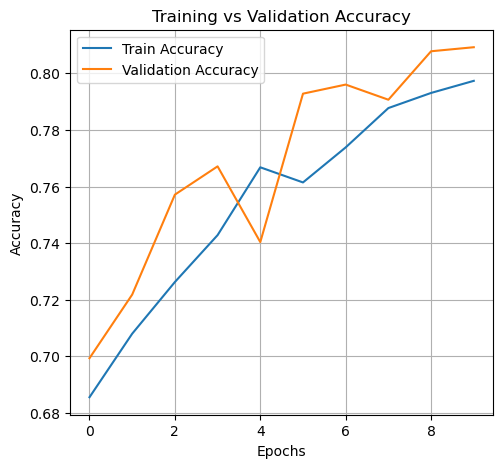

In [23]:
plt.figure(figsize=(12, 5))
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

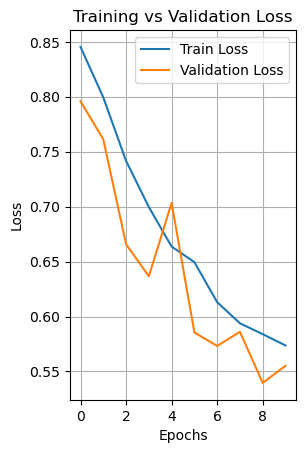

In [25]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<h2>Part C: Model Evaluation and Interpretation
</h2>

<h3>Evaluate the model</h3>

In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

In [29]:
# Predict on Test Set
test_generator.reset()  # ensure predictions start from first batch
pred_probs = model.predict(test_generator, verbose=1)
pred_classes = np.argmax(pred_probs, axis=1)  # predicted labels
true_classes = test_generator.classes        # true labels
class_labels = list(test_generator.class_indices.keys())

C:\Users\sheji\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 278ms/step


In [31]:
# Classification Report (Precision, Recall, F1-score)
report = classification_report(true_classes, pred_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

   buildings       0.76      0.82      0.79       437
      forest       0.95      0.98      0.97       474
     glacier       0.88      0.66      0.76       553
    mountain       0.75      0.79      0.77       525
         sea       0.82      0.83      0.82       510
      street       0.81      0.90      0.85       501

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.82      3000



<h3>report performance metrics</h3>

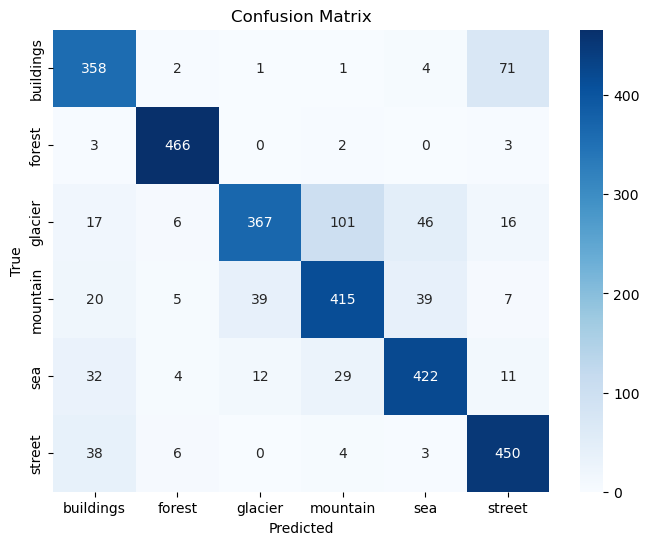

In [33]:
# Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [35]:
# Test Accuracy
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8260 - loss: 0.5005

Test Accuracy: 0.8260


<h3>Visualize Predictions</h3>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


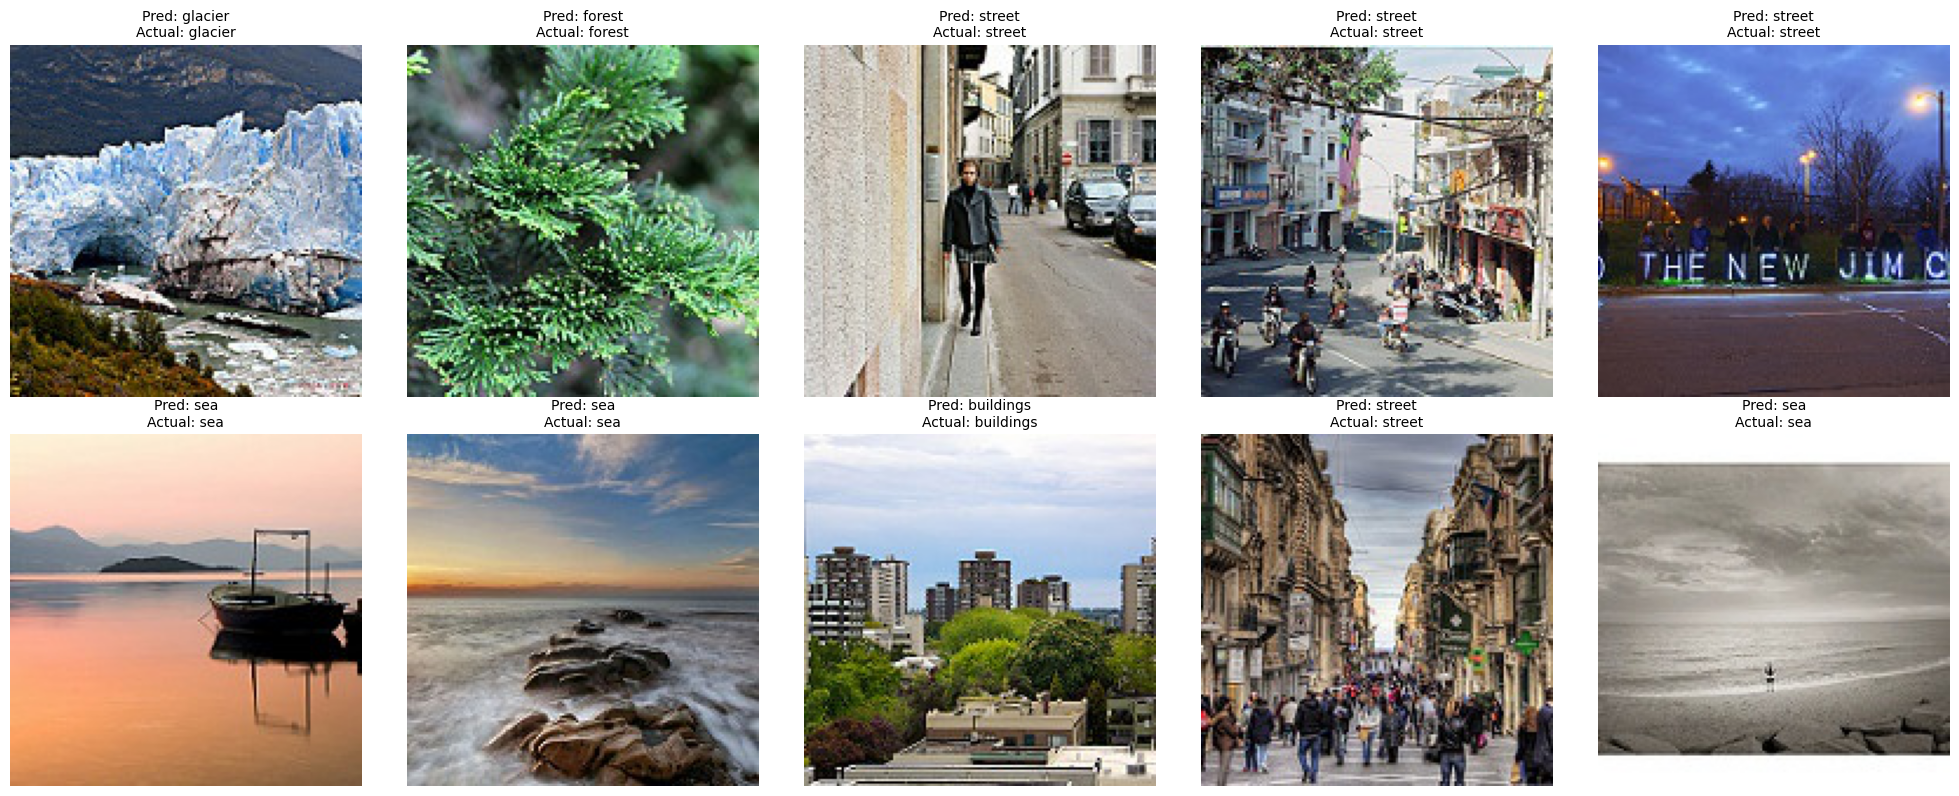

In [39]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
# Get file paths from test generator
test_file_paths = test_generator.filepaths
class_labels = list(test_generator.class_indices.keys())
# Select 10 random images
sample_paths = random.sample(test_file_paths, 10)
plt.figure(figsize=(20, 8))
for i, img_path in enumerate(sample_paths):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)  # add batch dimension
    # Make prediction
    pred_prob = model.predict(img_array_exp)
    pred_class = class_labels[np.argmax(pred_prob)]
    # True label from file path
    true_class = img_path.split(os.path.sep)[-2]
    # Plot image
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {pred_class}\nActual: {true_class}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()
